In [1]:
import matplotlib.pyplot as plt
import pandas as pd

EVALUATION_FOLDER = "evaluation_minbzk"
RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_BM25S.csv"

woo_data = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE}")

In [2]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Function to process data based on a number of dossiers and threshold
def process_data(num_dossiers):
    results_summary = []
    thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    for threshold in thresholds:
        headers = ['dossier_id', 'retrieved_dossier_id', 'confidence', 'result', 'scores']
        df = pd.DataFrame(columns=headers)

        for index, row in woo_data.iterrows():
            dossier_ids = row["retrieved_dossier_ids"].split(", ")[:num_dossiers]  # Limit the number of dossiers
            unique_dossier_ids_set = set(dossier_ids)
            unique_dossier_ids_dict = {key: 0 for key in unique_dossier_ids_set}

            if len(unique_dossier_ids_dict) <= 1:
                result = {key: 1 for key in unique_dossier_ids_dict}
            else:
                for key in unique_dossier_ids_dict:
                    for idx, dossier_id in enumerate(dossier_ids):
                        if key != dossier_id:
                            continue
                        unique_dossier_ids_dict[key] += dossier_ids[0:index + 1].count(dossier_id)/(index + 1)

                result = {key: value / sum(unique_dossier_ids_dict.values()) for key, value in unique_dossier_ids_dict.items()}

            max_key = max(result, key=result.get)
            df.loc[len(df)] = [
                row['dossier_id'],
                max_key,
                result[max_key],
                "N/A" if result[max_key] < threshold else row['dossier_id'] == max_key,
                str(result)
            ]

        true_count = df['result'].value_counts().get(True, 0)
        false_count = df['result'].value_counts().get(False, 0)
        na_count = df['result'].value_counts().get("N/A", 0)

        results_summary.append({
            'Threshold': threshold,
            'True': true_count,
            'False': false_count,
            'N/A': na_count
        })

    # Convert results_summary to DataFrame
    df_summary = pd.DataFrame(results_summary)
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot the results
    ax.plot(df_summary['Threshold'], df_summary['True'], label='True', marker='o')
    ax.plot(df_summary['Threshold'], df_summary['False'], label='False', marker='o')
    ax.plot(df_summary['Threshold'], df_summary['N/A'], label='N/A', marker='o')
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Count')
    ax.set_title(f'Results Summary for {num_dossiers} Dossiers')
    ax.legend()
    ax.grid(True)
    
    # Display the table and the plot side by side
    with output_table:
        output_table.clear_output(wait=True)
        display(df_summary)
    
    with output_plot:
        output_plot.clear_output(wait=True)
        plt.show()

# Create output widgets for the table and plot
output_table = widgets.Output()
output_plot = widgets.Output()

# Arrange them horizontally in an HBox
hbox = widgets.HBox([output_table, output_plot])

# Display the HBox
display(hbox)

# Interactive widget
dossier_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='Dossiers#:')

# Create an interactive display
widgets.interact(process_data, num_dossiers=dossier_slider)


interactive(children=(IntSlider(value=10, description='Dossiers#:', max=50, min=1), Output()), _dom_classes=('…

<function __main__.process_data(num_dossiers)>

Threshold: 0.0, True: 199, False: 42, N/A: 0
Threshold: 0.1, True: 199, False: 42, N/A: 0
Threshold: 0.2, True: 197, False: 33, N/A: 11
Threshold: 0.3, True: 194, False: 20, N/A: 27
Threshold: 0.4, True: 192, False: 17, N/A: 32
Threshold: 0.5, True: 186, False: 12, N/A: 43
Threshold: 0.6, True: 174, False: 5, N/A: 62
Threshold: 0.7, True: 163, False: 3, N/A: 75
Threshold: 0.8, True: 143, False: 2, N/A: 96
Threshold: 0.9, True: 127, False: 0, N/A: 114
Threshold: 1.0, True: 64, False: 0, N/A: 177


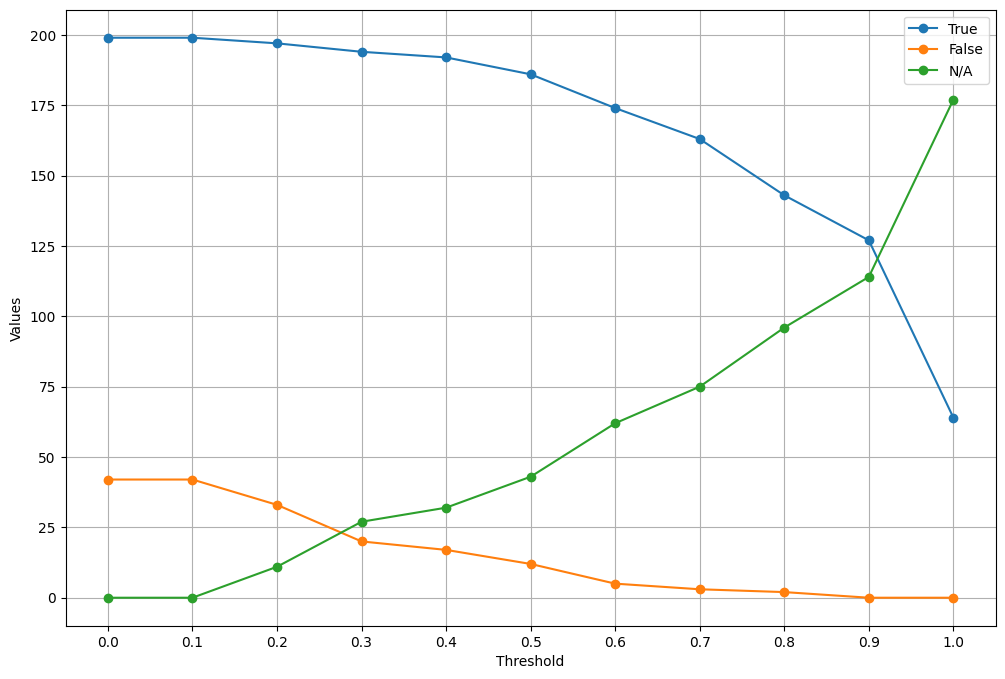

In [3]:
results_summary = []
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for threshold in thresholds:
    headers = ['dossier_id', 'retrieved_dossier_id', 'confidence', 'result', 'scores']
    df = pd.DataFrame(columns=headers)
    data_to_add = []

    for index, row in woo_data.iterrows():
        dossier_ids = row["retrieved_dossier_ids"].split(", ")
        unique_dossier_ids_set = set(dossier_ids)
        unique_dossier_ids_dict = {key: 0 for key in unique_dossier_ids_set}
        # If only 1 dossier has been retrieved, set confidence to 1
        if len(unique_dossier_ids_dict) <= 1:
            #  set confidence to 1
            result = {key: 1 for key in unique_dossier_ids_dict}
        else:
            # Iterate over the dossier# columns
            for key in unique_dossier_ids_dict:
                for index, dossier_id in enumerate(dossier_ids):
                    if key != dossier_id:
                        continue
                    unique_dossier_ids_dict[key] += dossier_ids[0:index + 1].count(dossier_id)/(index + 1)
            
            # Normalize values
            result = {key: value / sum(unique_dossier_ids_dict.values()) for key, value in unique_dossier_ids_dict.items()}

        # print(result)
        max_key = max(result, key=result.get)
        df.loc[len(df)] = [
            row['dossier_id'],
            max_key,
            result[max_key],
            "N/A" if result[max_key] < threshold else row['dossier_id'] == max_key,
            str(result)
        ]

    true_count = df['result'].value_counts().get(True, 0)
    false_count = df['result'].value_counts().get(False, 0)
    na_count = df['result'].value_counts().get("N/A", 0)

    print(f"Threshold: {threshold}, True: {true_count}, False: {false_count}, N/A: {na_count}")
    results_summary.append({
        'Threshold': threshold,
        'True': true_count,
        'False': false_count,
        'N/A': na_count
    })

results_df = pd.DataFrame(results_summary)
plt.figure(figsize=(12, 8))

plt.plot(results_df['Threshold'], results_df['True'], marker='o', label='True')
plt.plot(results_df['Threshold'], results_df['False'], marker='o', label='False')
plt.plot(results_df['Threshold'], results_df['N/A'], marker='o', label='N/A')

# plt.title('Results Summary for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Values')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

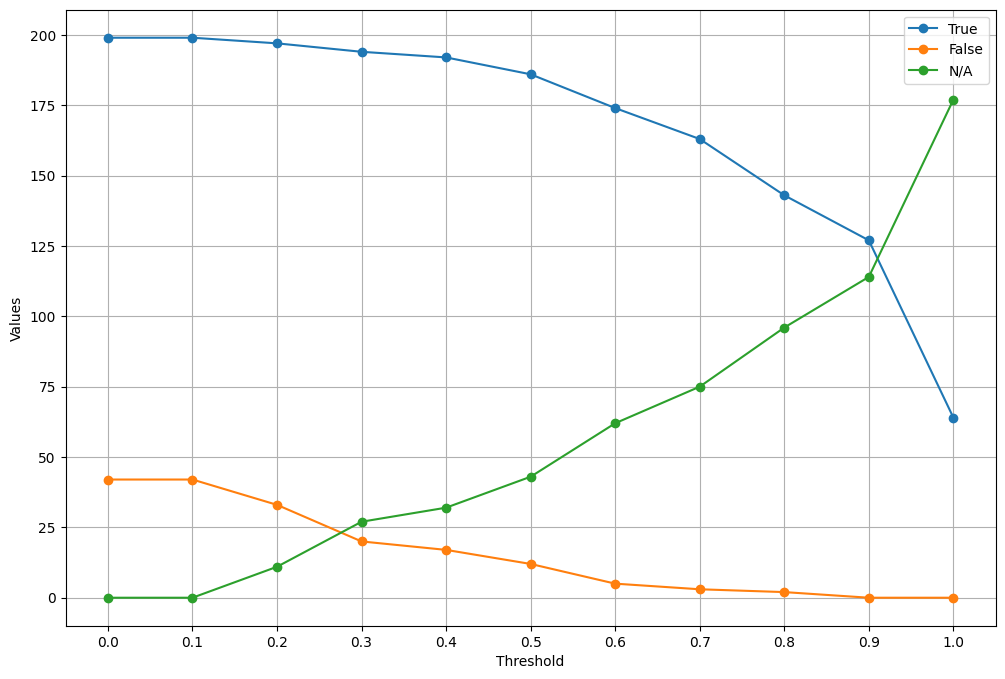

In [7]:
df.to_csv("test.csv", index=False)